# **Graph Workflows**

## **What's Covered?**
1. Sequential Graph
2. Conditional Graph
3. Conditional Looping Graph

## **Conditional Looping Graph**

In [1]:
from typing import List, TypedDict, Annotated
import operator

class AgentState(TypedDict):
    value: Annotated[List[int], operator.add]

In [2]:
import random

def random_node(state: AgentState) -> AgentState:
    """Generates a random number from 1 to 10"""
    random_number = random.randint(1, 10)
    return {"value": [random_number]}

def greeting_node(state: AgentState) -> AgentState:
    """Greeting Node which says hi to the person"""
    random_number = state["value"][-1]
    print(f"Generated {random_number}")
    return {}   # <- Return an empty dictionary. otherwise reducer will update the state


def should_continue(state: AgentState) -> AgentState:
    """Function to decide what to do next"""
    random_number = state["value"][-1]
    if random_number%2==0:
        return "loop"  # Continue looping
    else:
        return "exit"  # Exit the loop

In [3]:
from langgraph.graph import StateGraph, START, END 

graph = StateGraph(AgentState)

graph.add_node("random", random_node)
graph.add_node("greeting", greeting_node)

graph.add_edge(START, "random")
graph.add_conditional_edges("random", should_continue, {"exit": END, "loop": "greeting"})
graph.add_edge("greeting", "random")

app = graph.compile()

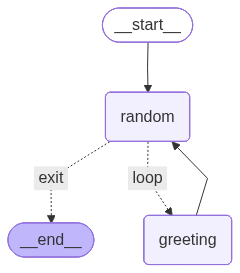

In [4]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
app.invoke({})

Generated 8
Generated 2


{'value': [8, 2, 9]}

## **Conditional Looping Graph**

In [6]:
from typing import List, TypedDict, Annotated
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    messages: Annotated[List[BaseMessage], add_messages]